<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-Jan2023-Assignments/blob/main/AA_data_exploration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Objectives**

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of Magnimind and the slightly messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve:

**which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?**

A borough is just a fancy word for the district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London (here's some info for the curious). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

##**1. Sourcing and Loading**

### **1.1. Importing Libraries**

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

###**1.2. Loading the data**

In [297]:
dataset = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(dataset, sheet_name='Average price', index_col= None)

## **2. Cleaning, transforming, and visualizing**

###**2.1. Exploring your data** 

In [298]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            337 non-null    datetime64[ns]
 1   City of London        338 non-null    object        
 2   Barking & Dagenham    338 non-null    object        
 3   Barnet                338 non-null    object        
 4   Bexley                338 non-null    object        
 5   Brent                 338 non-null    object        
 6   Bromley               338 non-null    object        
 7   Camden                338 non-null    object        
 8   Croydon               338 non-null    object        
 9   Ealing                338 non-null    object        
 10  Enfield               338 non-null    object        
 11  Greenwich             338 non-null    object        
 12  Hackney               338 non-null    object        
 13  Hammersmith & Fulham

In [299]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [300]:
properties.isna().sum()

Unnamed: 0                1
City of London            0
Barking & Dagenham        0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith & Fulham      0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington & Chelsea      0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
Unnamed: 34             338
Inner London        

In [301]:
properties.shape

(338, 49)

In [302]:
missing = pd.concat([properties.isnull().sum(), 100*properties.isnull().mean()], axis=1)
missing.columns=['count', 'Percentage']
missing

,count,Percentage
Unnamed: 0,1,0.295858
City of London,0,0.000000
Barking & Dagenham,0,0.000000
Barnet,0,0.000000
Bexley,0,0.000000
Brent,0,0.000000
Bromley,0,0.000000
Camden,0,0.000000
Croydon,0,0.000000
Ealing,0,0.000000


In [303]:
properties['Unnamed: 0']

0            NaT
1     1995-01-01
2     1995-02-01
3     1995-03-01
4     1995-04-01
         ...    
333   2022-09-01
334   2022-10-01
335   2022-11-01
336   2022-12-01
337   2023-01-01
Name: Unnamed: 0, Length: 338, dtype: datetime64[ns]

In [304]:
df = properties.drop(['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'], axis = 1) 

In [305]:
df.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,42095.8436,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,53590.8548


###**2.2. Cleaning the data**

In [306]:
propertiesT = df.transpose()
propertiesT.head()

,0,1,2,3,4,5,6,7,8,9,...,328,329,330,331,332,333,334,335,336,337
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,813979.74214,797892.55047,821514.79383,806856.05306,834332.03537,830627.92842,885696.33847,954661.97133,953204.66901,885406.47515
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,332604.43094,335021.08059,344835.81396,348109.0198,349807.27867,348544.55308,353195.14125,357675.7384,359579.90996,353635.45461
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,579950.33189,584662.31887,591029.86082,593474.16293,602160.5051,604970.15477,598727.6565,589432.211,591520.97288,594529.67878
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,384327.79155,386009.08336,389711.51594,395133.58979,400870.79852,402778.1912,407103.40353,406588.79277,410458.95974,401801.51546


In [307]:
propertiesT = propertiesT.reset_index()

In [308]:
new_header = propertiesT.iloc[0]
propertiesT = propertiesT[1:]
propertiesT.columns = new_header

propertiesT.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,813979.74214,797892.55047,821514.79383,806856.05306,834332.03537,830627.92842,885696.33847,954661.97133,953204.66901,885406.47515
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,332604.43094,335021.08059,344835.81396,348109.0198,349807.27867,348544.55308,353195.14125,357675.7384,359579.90996,353635.45461
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,579950.33189,584662.31887,591029.86082,593474.16293,602160.5051,604970.15477,598727.6565,589432.211,591520.97288,594529.67878
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,384327.79155,386009.08336,389711.51594,395133.58979,400870.79852,402778.1912,407103.40353,406588.79277,410458.95974,401801.51546
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,518862.05779,528460.43896,531851.10266,548766.79416,559694.43572,579715.65953,576500.99942,570808.32592,563864.18263,558238.93628


In [309]:
propertiesT.rename(columns={'Unnamed: 0':'London_Borough',pd.NaT: 'ID'},inplace=True)

###**2.3.Transforming the data**

In [310]:
properties_melted = pd.melt(propertiesT, id_vars = ['London_Borough','ID'])

In [311]:
properties_melted.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [312]:
properties_melted.rename(columns={0:'Month','value': 'Average_Price'},inplace=True)
properties_melted.head()

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [313]:
properties_melted['Average_Price'] = pd.to_numeric(properties_melted['Average_Price'])

In [314]:
properties_melted.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_Price            float64
dtype: object

###**2.4. Cleaning the data**

In [315]:
properties_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15165 entries, 0 to 15164
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London_Borough  15165 non-null  object        
 1   ID              15165 non-null  object        
 2   Month           15165 non-null  datetime64[ns]
 3   Average_Price   15165 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 474.0+ KB


In [316]:
properties_melted['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [317]:
properties_melted = properties_melted[(properties_melted.London_Borough != 'Unnamed: 34')\
                    & (properties_melted.London_Borough != 'Unnamed: 37') & (properties_melted.London_Borough != 'Unnamed: 47')]

In [318]:
properties_melted['London_Borough'].nunique()

45

In [319]:
nonBoroughs = ['City of London','Inner London','Outer London','NORTH EAST', 'NORTH WEST','YORKS & THE HUMBER','EAST MIDLANDS','WEST MIDLANDS','EAST OF ENGLAND','LONDON','SOUTH EAST','SOUTH WEST','England']

In [320]:
properties_melted = properties_melted[~properties_melted['London_Borough'].isin(nonBoroughs)]

In [321]:
properties_melted['London_Borough'].nunique()

32

In [322]:
properties_melted['ID'].isnull().values.any()

False

In [323]:
properties_melted['Average_Price'].isnull().values.any()

False

In [324]:
df = properties_melted
df

,London_Borough,ID,Month,Average_Price
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
...,...,...,...,...
15148,Sutton,E09000029,2023-01-01,445260.37881
15149,Tower Hamlets,E09000030,2023-01-01,488832.80329
15150,Waltham Forest,E09000031,2023-01-01,512507.86867
15151,Wandsworth,E09000032,2023-01-01,641738.46970


###**2.5. Visualizing the data**

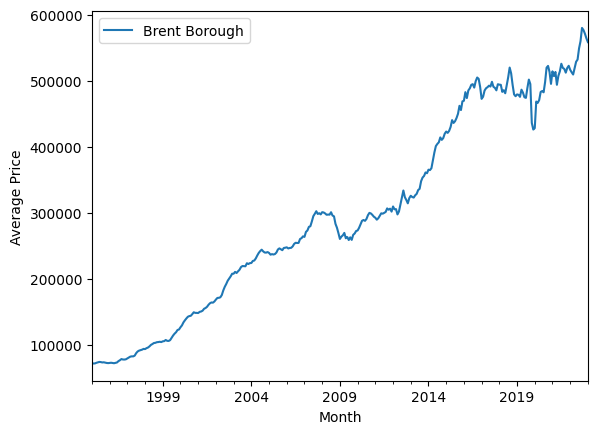

In [325]:
barnet_prices = df[df['London_Borough']=='Brent']
barnet_vis = barnet_prices.plot(kind='line',x='Month',y='Average_Price')
barnet_vis.set_xlabel('Month')
barnet_vis.set_ylabel('Average Price')
barnet_vis.legend(['Brent Borough'])

In [326]:
df['Year'] = df['Month'].apply(lambda x: x.year)

##**3. Modeling**

In [327]:
df_grouped = df.groupby(by=['London_Borough','Year']).mean()
df_grouped

Average_Price
London_Borough     Year               
Barking & Dagenham 1995   51817.969390
                   1996   51718.192690
                   1997   55974.262309
                   1998   60285.821083
                   1999   65320.934441
...                                ...
Westminster        2019  955998.608925
                   2020  960469.218567
                   2021  962777.447967
                   2022  992720.395823
                   2023  905401.399100

[928 rows x 1 columns]

In [328]:
df_grouped = df_grouped.reset_index()
df_grouped.head(10)

,London_Borough,Year,Average_Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441
5,Barking & Dagenham,2000,77549.513290
6,Barking & Dagenham,2001,88664.058223
7,Barking & Dagenham,2002,112221.912482
8,Barking & Dagenham,2003,142498.927800
9,Barking & Dagenham,2004,158175.982483


In [329]:
def create_price_ratio(f):
    avg_price_1998 = float(f.loc[f['Year']==1998, 'Average_Price'])
    avg_price_2018 = float(f.loc[f['Year']==2018, 'Average_Price'])
    return [avg_price_2018/avg_price_1998]

In [330]:
ratios = {}
for borough in df_grouped['London_Borough'].unique():
    ratios[borough] = create_price_ratio(df_grouped[df_grouped['London_Borough']==borough])

In [331]:
df_ratios = pd.DataFrame(ratios)
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,4.896619,4.358196,4.248977,4.894554,4.094785,4.935353,4.2011,4.311451,4.263472,4.763036,...,4.741273,5.30539,4.471182,4.005162,5.516485,4.118523,4.626701,5.834756,4.757709,5.353565


In [332]:
df_ratiosT = df_ratios.transpose()
df_ratiosT = df_ratiosT.reset_index()
df_ratiosT.dtypes

index     object
0        float64
dtype: object

In [333]:
df_ratiosT.rename(columns={'index':'London_Borough',0: 'Housing_Ratio'},inplace=True)
df_ratiosT.head()

,London_Borough,Housing_Ratio
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [334]:
top15= df_ratiosT.sort_values(by='Housing_Ratio',ascending=False).head(20)

[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'Haringey'),
 Text(7, 0, 'Kensington & Chelsea'),
 Text(8, 0, 'Lambeth'),
 Text(9, 0, 'Camden'),
 Text(10, 0, 'Barking & Dagenham'),
 Text(11, 0, 'Brent'),
 Text(12, 0, 'Islington'),
 Text(13, 0, 'Greenwich'),
 Text(14, 0, 'Wandsworth'),
 Text(15, 0, 'Merton'),
 Text(16, 0, 'Tower Hamlets'),
 Text(17, 0, 'Redbridge'),
 Text(18, 0, 'Barnet'),
 Text(19, 0, 'Havering')]

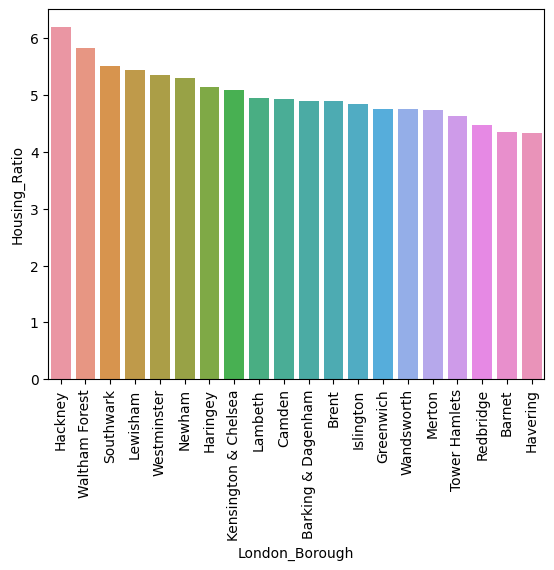

In [335]:
plotting = sns.barplot(data=top15, x='London_Borough', y='Housing_Ratio')
plotting.set_xticklabels(top15.London_Borough, rotation=90)

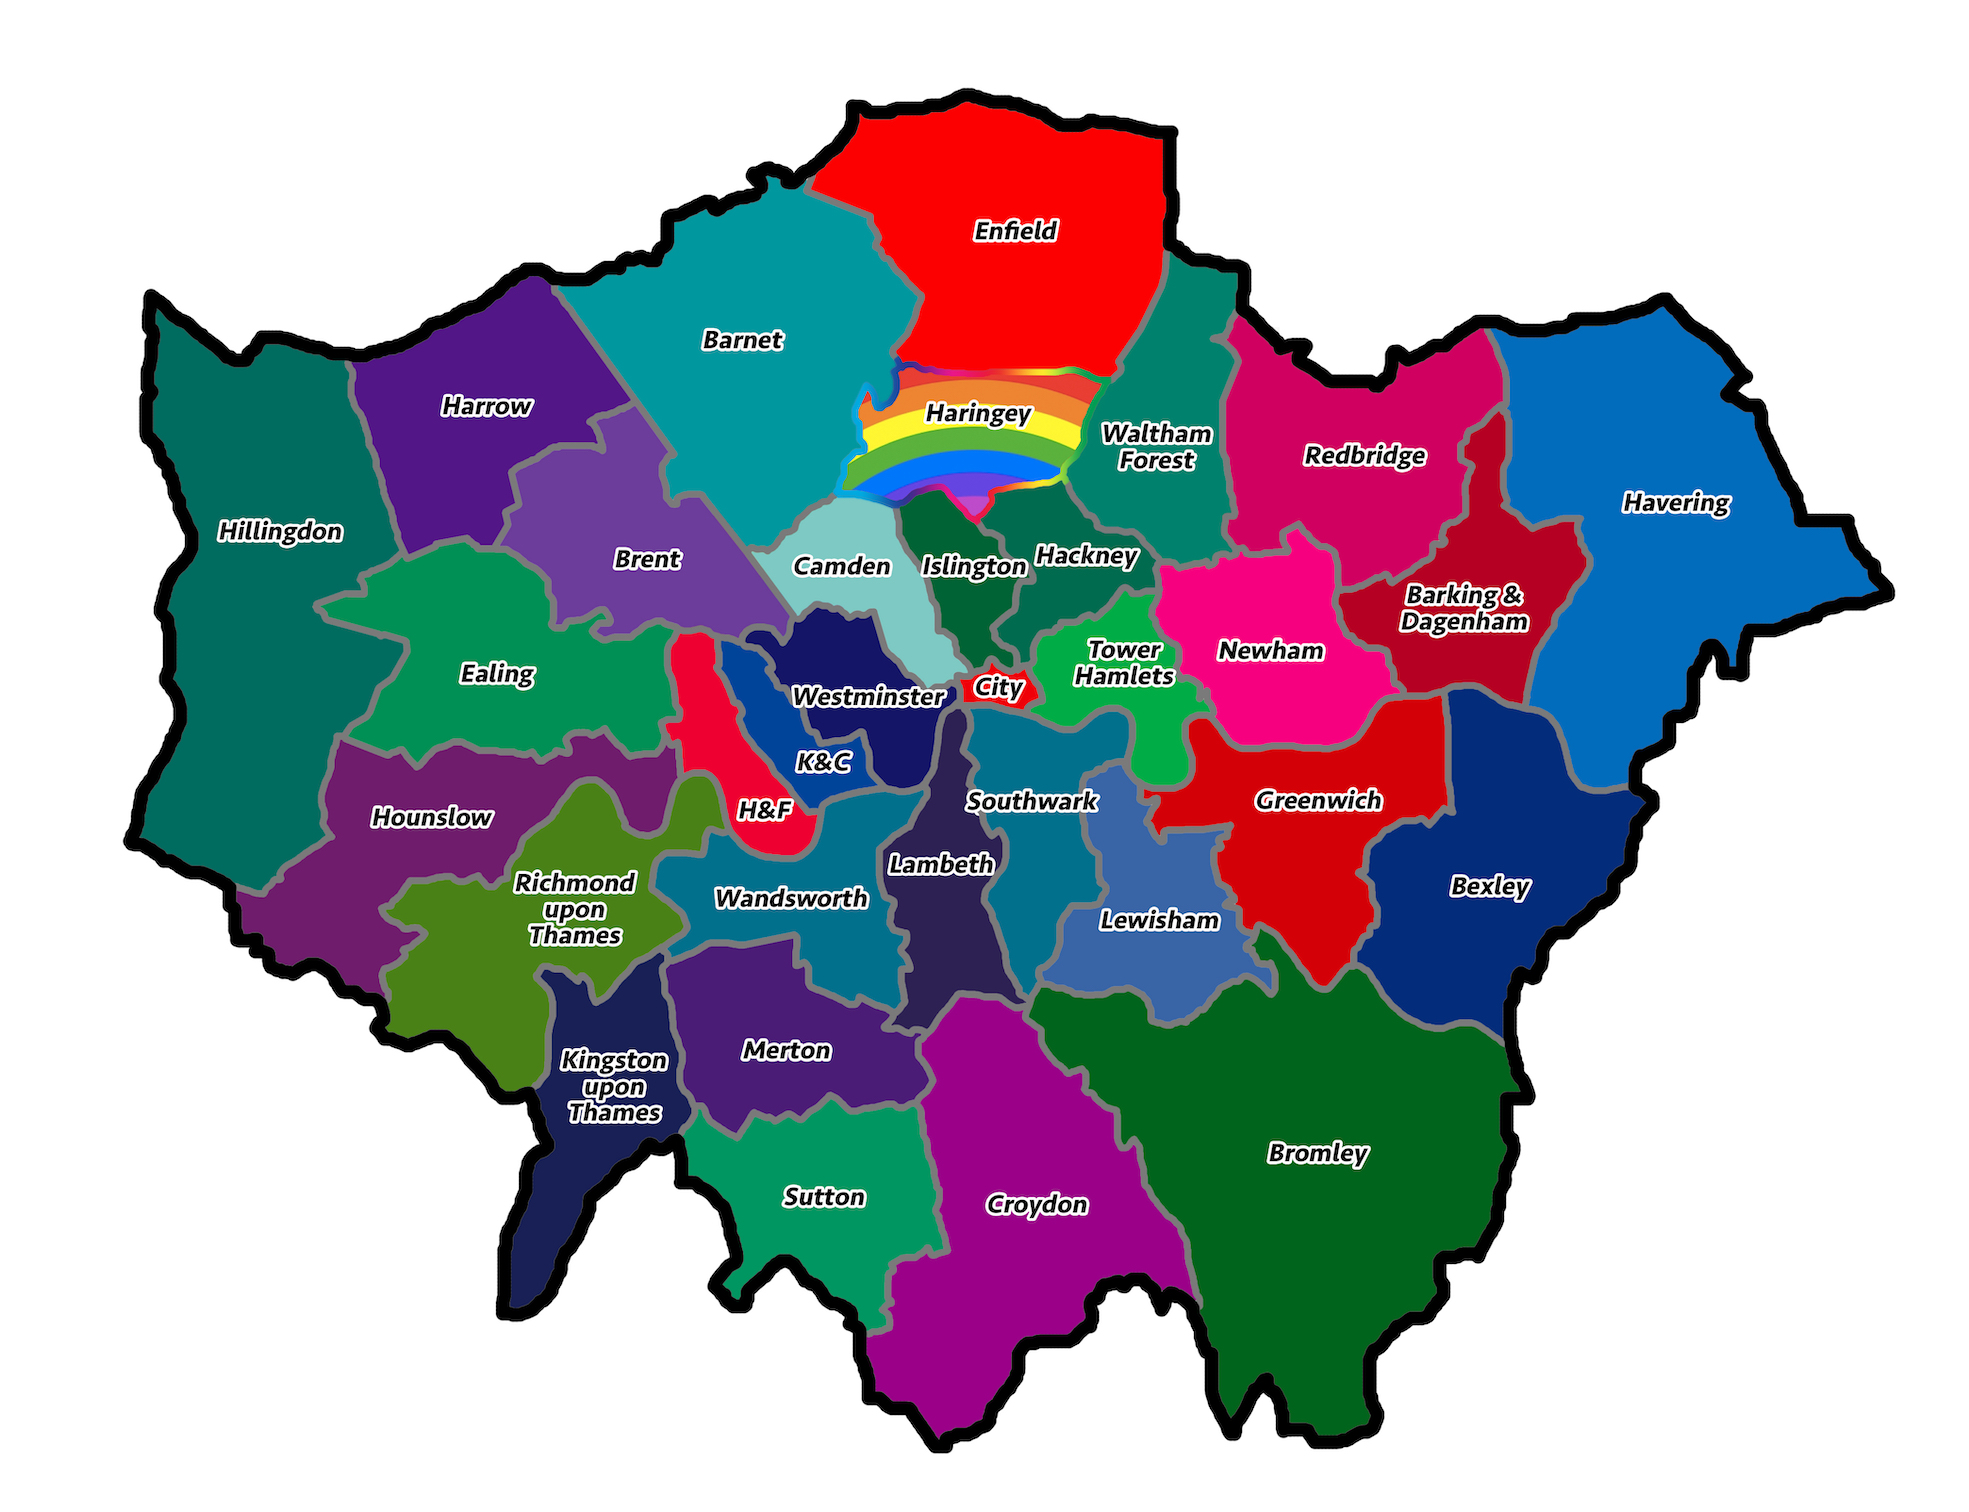

## **4. Conclusion**

We can draw some conclusions about the trends in house prices in different boroughs of London:

1. The most expensive boroughs tend to be in central London.
2. The least expensive boroughs tend to be in the outer areas of London, such as Barking & Dagenham and Bexley.
3. The ratio of house prices to household income also varies significantly across London boroughs, with some boroughs having much higher ratios than others.
4. There is a general trend of higher house prices and higher housing ratios in boroughs closer to central London.


Overall, the analysis suggests that London's housing market is complex and can vary significantly depending on the borough. There is a general trend of higher prices and ratios in central boroughs, while outer boroughs tend to be more affordable.





